# **Neural Networks Keras "Sequential Class" Tutorial**

(Dr. Ilya Alexakhin 2023-24)

This tutorial execrise is designed to introduce Neural Networks using the Keras Sequential Class mode of architecture construction.

PLEASE FOLLOW THE INSTRUCTIONS CAREFULLY and at first just run the code "as is" and try to understand what it is doing by reading all of the markdown and comments thoroughly. At the bottom you will be given instructions on how to conduct your own manual hyper-parameter tuning process in order to gain better intuition about how each hyper-parameter influences model construction and performance.

DO NOT WORRY if you do not have time to finish any, or all of the prompts, or any of the other tutorials, as gaining familiarity with these expansive topics and code libraries is MUCH more important, than obtaining a "correct" answer or even a highly performing model instance. The MNIST dataset is considered a very easy dataset to fit, so it was chosen specifically to allow time and brainpower to be focused on exploring the various aspects of the model creation pipeline.

If you have experience with Keras "Sequential Class" model building, and/or have time/desire to try the more advanced Keras Model API, try the other tutorial that utilizes it on the California Housing dataset.

In [1]:
import keras #<-- A user-friendly high-level library that uses TensorFlow as a backend find guides here: https://keras.io/guides/sequential_model/
# Some specific commands we will need from Keras:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.datasets import mnist
from keras import layers
import pandas as pd #<--data manipulation library useful for array/matrix manipulation via propriatary object type called "DataFrame"
import numpy as np #<-- Array manipulation library
from numpy import random #<-- Specific command we'll need from numpy to sample the test set at random
from matplotlib import pyplot #<-- standard Python graphing library

In [12]:
# Load and split the data while retaining its shape
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() #<--Load the MNIST dataset
# MNIST dataset comes as "tuples" and is made into Numpy arrays (https://keras.io/api/datasets/mnist/)
assert x_train.shape == (60000, 28, 28) #<--Assert command makes sure our inputs and outputs are in correct shape
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)
# Check the shapes of our train and test(evaluation) sets if you change them in the cell above
print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(y_train))
print(np.shape(y_test))

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


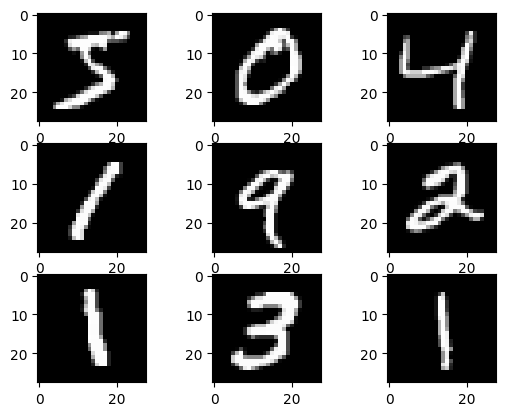

In [13]:
# Lets look at some of our data, by making some subplots that show the 28 by 28 pixel images of our handwritten digits
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [14]:
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train_oh = keras.utils.to_categorical(y_train, num_classes)
y_test_oh = keras.utils.to_categorical(y_test, num_classes)
print("First 9 training lables:\n", y_train[:9].reshape(9,1))
print("Same first 9 training lables as one-hot encoded vectors:\n", y_train_oh[:9])

First 9 training lables:
 [[5]
 [0]
 [4]
 [1]
 [9]
 [2]
 [1]
 [3]
 [1]]
Same first 9 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Notice in the above print that the label "0" corresponds with class label [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] and "9" with [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.].

Thus, our classes are 0 to 9.

Also notice that the labels and their one-hot encodings match the input images in the earlier plot perfectly. This MUST be correct since the model will be given these input-output pairs as 'ground truth.'

_____________________________________________________________________________

Now we need to convert the 28 by 28 input images into a one-dimensional shape of 784, in order to be accepted into our first hidden network layer.

In [15]:
# Flatten the "28 by 28" 2D images into a "784 by 1" shape to align with model input layer
image_vector_size = x_train.shape[1] * x_train.shape[2] #<--Remember shape[0] is 60000, so here we need to flatten dim1 and dim2 together for a 60000 by 784 array
x_train_r = x_train.reshape(x_train.shape[0], image_vector_size) #<--Here we use image_vector_size to pass the "784" value dynamically
x_test_r = x_test.reshape(x_test.shape[0], image_vector_size) #<--Reshape the test set into 10000 by 784 array
print("The input training set shape is: ",x_train_r.shape,"or 60000 samples of 784 pixels")
print("The output training set shape is:",y_train_oh.shape," or 60000 samples of 10 class vectors")
print("The input test set shape is:     ",x_test_r.shape,"or 10000 samples of 784 pixels")
print("The output test set shape is:    ",y_test_oh.shape," or 10000 samples of 10 class vectors")

The input training set shape is:  (60000, 784) or 60000 samples of 784 pixels
The output training set shape is: (60000, 10)  or 60000 samples of 10 class vectors
The input test set shape is:      (10000, 784) or 10000 samples of 784 pixels
The output test set shape is:     (10000, 10)  or 10000 samples of 10 class vectors


In [16]:
# Build the neural network model architecture
model = keras.Sequential() #<--Set the model class to Sequential (tell Keras that you want to build the model 1 layer at a time, more here: https://keras.io/api/)
model.add(Dense(64, activation='relu', input_shape=(image_vector_size,))) #<--First hidden layer needs the EXACT shape of each input (image_vector_size maintains 784 shape)
#Units per layer^^     More on ^Relu^ here: https://en.wikipedia.org/wiki/Rectifier_(neural_networks)
#model.add(Dropout(0.25)) #<--Hint: uncomment the beginning of this line later in the exercise
#model.add(Dense(32, activation='relu')) #<--Hint: uncomment the beginning of this line later in the exercise
#model.add(Dropout(0.25)) #<--Hint: uncomment the beginning of this line later in the exercise
model.add(Dense(10, activation='softmax')) #<--Final layer that will output probabilitites of each digit (from 0 to 9 ); must be paired with categorical cross-entropy
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In the above print, note that "None" means that dimension 0 (first number in a default Python index is 0) is variable in size, but the second dimension must have a set size, or 64 for our hidden layer. In this case a 784 by 64 product will be delivered to the final layer.

The final layer is a dense (fully connected) layer that outputs a "1 by 10" product where each class probability is considered by the softmax function, that picks a single class to be the strongest choice for our prediction by choosing the vector component with the maximum value.

Our first model has only 50890 trainable parameters while ChatGPT4 is rumoured to have 1 trillion!

Epoch 1/30
938/938 - 3s - 4ms/step - accuracy: 0.8285 - loss: 3.1459 - val_accuracy: 0.8880 - val_loss: 0.6602
Epoch 2/30
938/938 - 4s - 4ms/step - accuracy: 0.9047 - loss: 0.5565 - val_accuracy: 0.9014 - val_loss: 0.5117
Epoch 3/30
938/938 - 4s - 4ms/step - accuracy: 0.9284 - loss: 0.4181 - val_accuracy: 0.9282 - val_loss: 0.4552
Epoch 4/30
938/938 - 3s - 3ms/step - accuracy: 0.9397 - loss: 0.3473 - val_accuracy: 0.9312 - val_loss: 0.4856
Epoch 5/30
938/938 - 4s - 4ms/step - accuracy: 0.9477 - loss: 0.3138 - val_accuracy: 0.9396 - val_loss: 0.4208
Epoch 6/30
938/938 - 4s - 4ms/step - accuracy: 0.9519 - loss: 0.2720 - val_accuracy: 0.9490 - val_loss: 0.4848
Epoch 7/30
938/938 - 2s - 2ms/step - accuracy: 0.9560 - loss: 0.2716 - val_accuracy: 0.9513 - val_loss: 0.4581
Epoch 8/30
938/938 - 3s - 3ms/step - accuracy: 0.9584 - loss: 0.2382 - val_accuracy: 0.9476 - val_loss: 0.4050
Epoch 9/30
938/938 - 2s - 3ms/step - accuracy: 0.9606 - loss: 0.2177 - val_accuracy: 0.9499 - val_loss: 0.4261
E

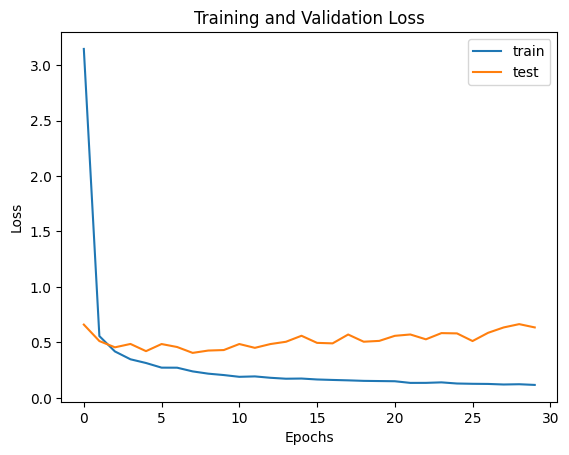

In [17]:
# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
#callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5) #<--Hint for getting 2.ii to work (will also need to insert callbacks=[callback] into the model.fit kwargs)

# Train the model and save it to a variable called "history"
history = model.fit(x_train_r, y_train_oh, batch_size=64, epochs=30, verbose=2, validation_data=(x_test_r, y_test_oh))

# Plot the train/test losses over the number of epocs to visualize the "learning" process.
# The lower the loss the closer we are to the optimal set of weights, known as convegence!
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.title("Training and Validation Loss")
pyplot.xlabel("Epochs")
pyplot.ylabel("Loss")
pyplot.legend()
pyplot.show()

In [18]:
#Lets print the last epoch's loss and accuracy on the test set (can put into hyper-parameter table as Ver.0):
score = model.evaluate(x_test_r, y_test_oh, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1],"\nThis means the model predicted",
      np.round(score[1],3)*100,
      "% of the test set examples correctly, or predicting the digit correspoding to the actual label.")

Test loss: 0.6346960663795471
Test accuracy: 0.9575999975204468 
This means the model predicted 95.8 % of the test set examples correctly, or predicting the digit correspoding to the actual label.


Write down the test loss and accuracy for the correct model Version to note its overall performance (we will be making a table using these values as part of the exercise later).

You also might want to save the plot above as image for reference later. (right-click/save to local machine will do for now, but title it with the version number starting with Ver.0 for the default one provided).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The model predicts the image to correspond to label:
 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]] or " 3 "
The actual label for the image is:
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] or " 3 "


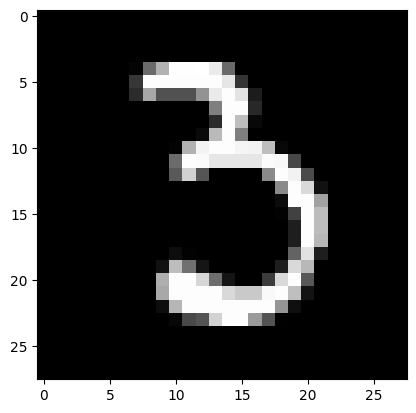

In [19]:
# Lets try and predict a random image from the test set
r = random.randint(10000) #<--Get a random value from 1 to 10000 to sample the test set
pyplot.imshow(x_test[r], cmap=pyplot.get_cmap('gray')) #<--Show the image for reference
print("The model predicts the image to correspond to label:\n",
      model.predict(x_test_r[r].reshape(1,784)).round(1),'or "',
      np.argmax(model.predict(x_test_r[r].reshape(1,784))),'"') #<--Predict the image, rounding to #float (0 for int)
print("The actual label for the image is:\n",y_test_oh[r],'or "',
      np.argmax(y_test_oh[r]),'"') #<--Print the actual label for comparison

Re-run the above cell a few times, its fun to see the model guess!

In [20]:
# Now lets predict the entire set for comparison with the actual test set and calculate the accuracy manually to get better practice with Pandas

yhat = model.predict(x_test_r) #<--Predict the entire test set
diff = pd.DataFrame(data=np.argmax(yhat, axis=1), columns=['pred']) #<--Make a Pandas dataframe called diff (for difference) and load it with prediction label
diff['act'] = np.argmax(y_test_oh, axis=1) #<--And add to it the actual labels

print('Manual calculation of accuracy, or:\n',
      'total number of test set examples minus incorrect predictions, divided by total number of test set examples, or:\n',
      y_test_oh.shape[0],'minus',diff.loc[(diff['pred']-diff['act'])!=0].shape[0],'divided by',y_test_oh.shape[0],'is:\n',
       (y_test_oh.shape[0]-diff.loc[(diff['pred']-diff['act'])!=0].shape[0])/y_test_oh.shape[0],'or',
      (y_test_oh.shape[0]-diff.loc[(diff['pred']-diff['act'])!=0].shape[0])/y_test_oh.shape[0]*100,'%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Manual calculation of accuracy, or:
 total number of test set examples minus incorrect predictions, divided by total number of test set examples, or:
 10000 minus 424 divided by 10000 is:
 0.9576 or 95.76 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The model predicts the image to correspond to label:
 [[0.   0.   0.39 0.   0.   0.   0.   0.61 0.   0.  ]] or " 7 "
The actual label for the image is:
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] or " 2 "


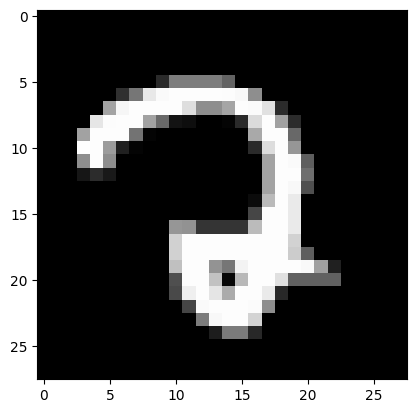

In [21]:
# Lets predict an image from ONLY the incorrect portion of the test set to see why its getting it wrong

r = random.choice(diff.loc[(diff['pred']-diff['act'])!=0].index) #<--Randomly sample the index of incorrect samples (using some Pandas loc code)
pyplot.imshow(x_test[r], cmap=pyplot.get_cmap('gray')) #<--Show the image for reference
print("The model predicts the image to correspond to label:\n",model.predict(x_test_r[r].reshape(1,784)).round(2),'or "',
      np.argmax(model.predict(x_test_r[r].reshape(1,784))),'"') #<--Predict the image, and print the resulting prediction probability output vector
print("The actual label for the image is:\n",y_test_oh[r],'or "',
      np.argmax(y_test_oh[r]),'"') #<--Print the actual label for comparison

Re-run the above cell a few times to get an idea about what sort of inputs the model is mispredicting.

Isn't it interesting that the model is mispredicting the samples that are somewhat close in shape to its predictions due to handwriting style?

It seems to have missed the decision boundaries around some of these more rare cases.

Also you can sometimes see the model having other options for the softmax function, showing that several probabilities were present, with the largest being picked in the end.



# Exercises

Now try to changing 1 hyper-parameter at a time in the above code and record the new model version's configuration and performance. An Excel table is a good way to keep track of this manual hyper-parameter exploration, known as "brute force." For the first row you can use v.0, or the default version of the model in the above code and its hyperparameters and performance metric(s) as columns.

For example:

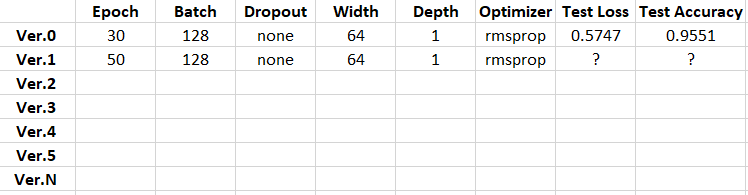

Don't worry if you don't get the exact values when you run the code as the ones I got, as no two model fittings will be the same! (keen minds will rememeber that this is due to the initialization routine setting initial node weights and biases with randomly sampled values). Also, feel free to copy paste bits of code into different notebooks or make your own, the point of the exercise is to tweak as many hyper-parameter "knobs" as you can to get comfortable with the process of generating the best possible model version.

Remember to keep the train/test split the same for all of the versions trialed, otherwise it will not be a fair comparison.

Ideally each model would be saved into a special "h3" file so they can be loaded later without needing to retrain each configuration, but as this can be difficult to accomplish in Colab (unless you are comfortable saving to your G-Drive via code, or otherwise exporting non-notebook files out of Colab), saving the test loss and accuracy will be enough (you are welcome to research and implement model save/load functionality in your local machine environment if able). Additionally, you can right-click/save the history plot for reference as it can give you an idea of how turbulent, or "choppy" your convergence was onto the (hopefully) global minimum.   

Some hyper-parameter changes to try for tuning are outlined below. Parts labelled "ii." are more difficult and involve some independent research. Thus, first do all the part i's, then either do ii's or move onto the other tutorial.

Remember to only change 1 hyper-parameter with each subsequent version, otherwise it will not be clear which one is affecting the performance. This is a major drawback of using the manual/brute-force method as the number of combinations is near-infinite even for smaller networks, but by tinkering with each of them by hand, you can gain better intuition about the methodology as a whole. The other tutorial will offer the option of a more sophisticated hyper-parameter tuning process.


1. Training epochs

  i. Change the epoc number to see after how many epochs the train/test loss improvement becomes insignificant. Record the test loss/acc in your table.
  
  ii. Research and implement additional "early stopping" code to stop training after a set number of epochs without any performance improvements. (hint: you will need to first set a "callback" variable and then call for it in the "model.fit" function, shown in https://keras.io/api/callbacks/early_stopping/)  


2. Batch size
  
  i. The smaller the size the more frequently the gradient descent updates will be made. Remember to hold the other hyper-parameters constant, only changing one at a time. If you want to go back and change the number of epochs, then do so while holding batch size constant.   

  ii. Research and implement additional "learning rate" code to change the default setting of the hyper-parameter "alpha" (default is 0.01). Examine the interaction between batch size and learning rate (if any) by looking at how turbulent or "choppy" the history plot looks to gain an idea of how learning rate in combination with batch size can affect the convergence on the (hopefully) global minimum.


3. Dropout Regularization

  i. Uncomment the dropout layer code in the model-building section for each layer and check that the dropout layer has been added in the model summary. Note how it does not affect the total number of trainable parameters. The decimal given is a ratio/percentage of units to be randomly turned off. Experiment with values from .2 to .5 and note the impact on performance in your table. REMEMBER TO NEVER ADD DROPOUT TO THE FINAL OUTPUT LAYER.

  ii. Once you have implemented parts 4.i and 5.i try adding dropout to only some of the non-final layers, and/or adding it in varied amounts to different layers. Note the points at which you start losing performance and try to understand why it is so. Is your model turning off nodes crucial to learning?


4. Model "Width"

  i. Vary the number of hidden units in each layer (ECXEPT FINAL).

  ii. Try setting each layer's number of units to powers of 2 (i.e. 32, 64, 128 and so on), that descend in size over the depth of layers (need to do 5.i for this). Some research indicates that this can sometimes help in memory allocation during matrix calculations for the hardware used to fit the model, resulting in faster or even better performance. Could this be the case for Colab or your local environment?

5. Model "Depth"

  i. Add more hidden layers to the network (1 layer = depth of 1, 2 = depth of 2 etc.) and compare performance results with other model versions.

  ii. Typically the deeper layers will have fewer hidden units, creating a funnel shape towards the final layer. Try the opposite: from small amounts of hidden units in early layers (narrow) to large amounts in later layers (wide), or keep all of the layers the same width throughout the depth of the network. Think about the difference between increasing model width vs its depth.

6. Optimizers and Loss/Activation functions

  i. Try these optimizers instead of "rmsprop": "SGD", "adam", "nadam" and others found on https://keras.io/api/optimizers/

  ii. Try changing the final layer's activation function to "sigmoid" with and without changing the loss function to "binary_crossentropy". Try to understand what happens when we change the final layer's activation function and why it heavily affects the loss function the way it does.
